**IMPORT THE NECESSARY LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**READ THE DATASET**

In [2]:
def read_data(a_file):
    """This function reads a csv file"""
    return pd.read_csv(a_file)

In [3]:
df = read_data(a_file='rock_density_xray.csv')

In [4]:
df

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
...,...,...
295,0.700227,2.112965
296,58.586585,2.000293
297,54.674548,1.879181
298,15.162434,2.644990


**PERFORM EXPLORATORY DATA ANALYSIS**

In [5]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


<Axes: xlabel='Rebound Signal Strength nHz', ylabel='Rock Density kg/m3'>

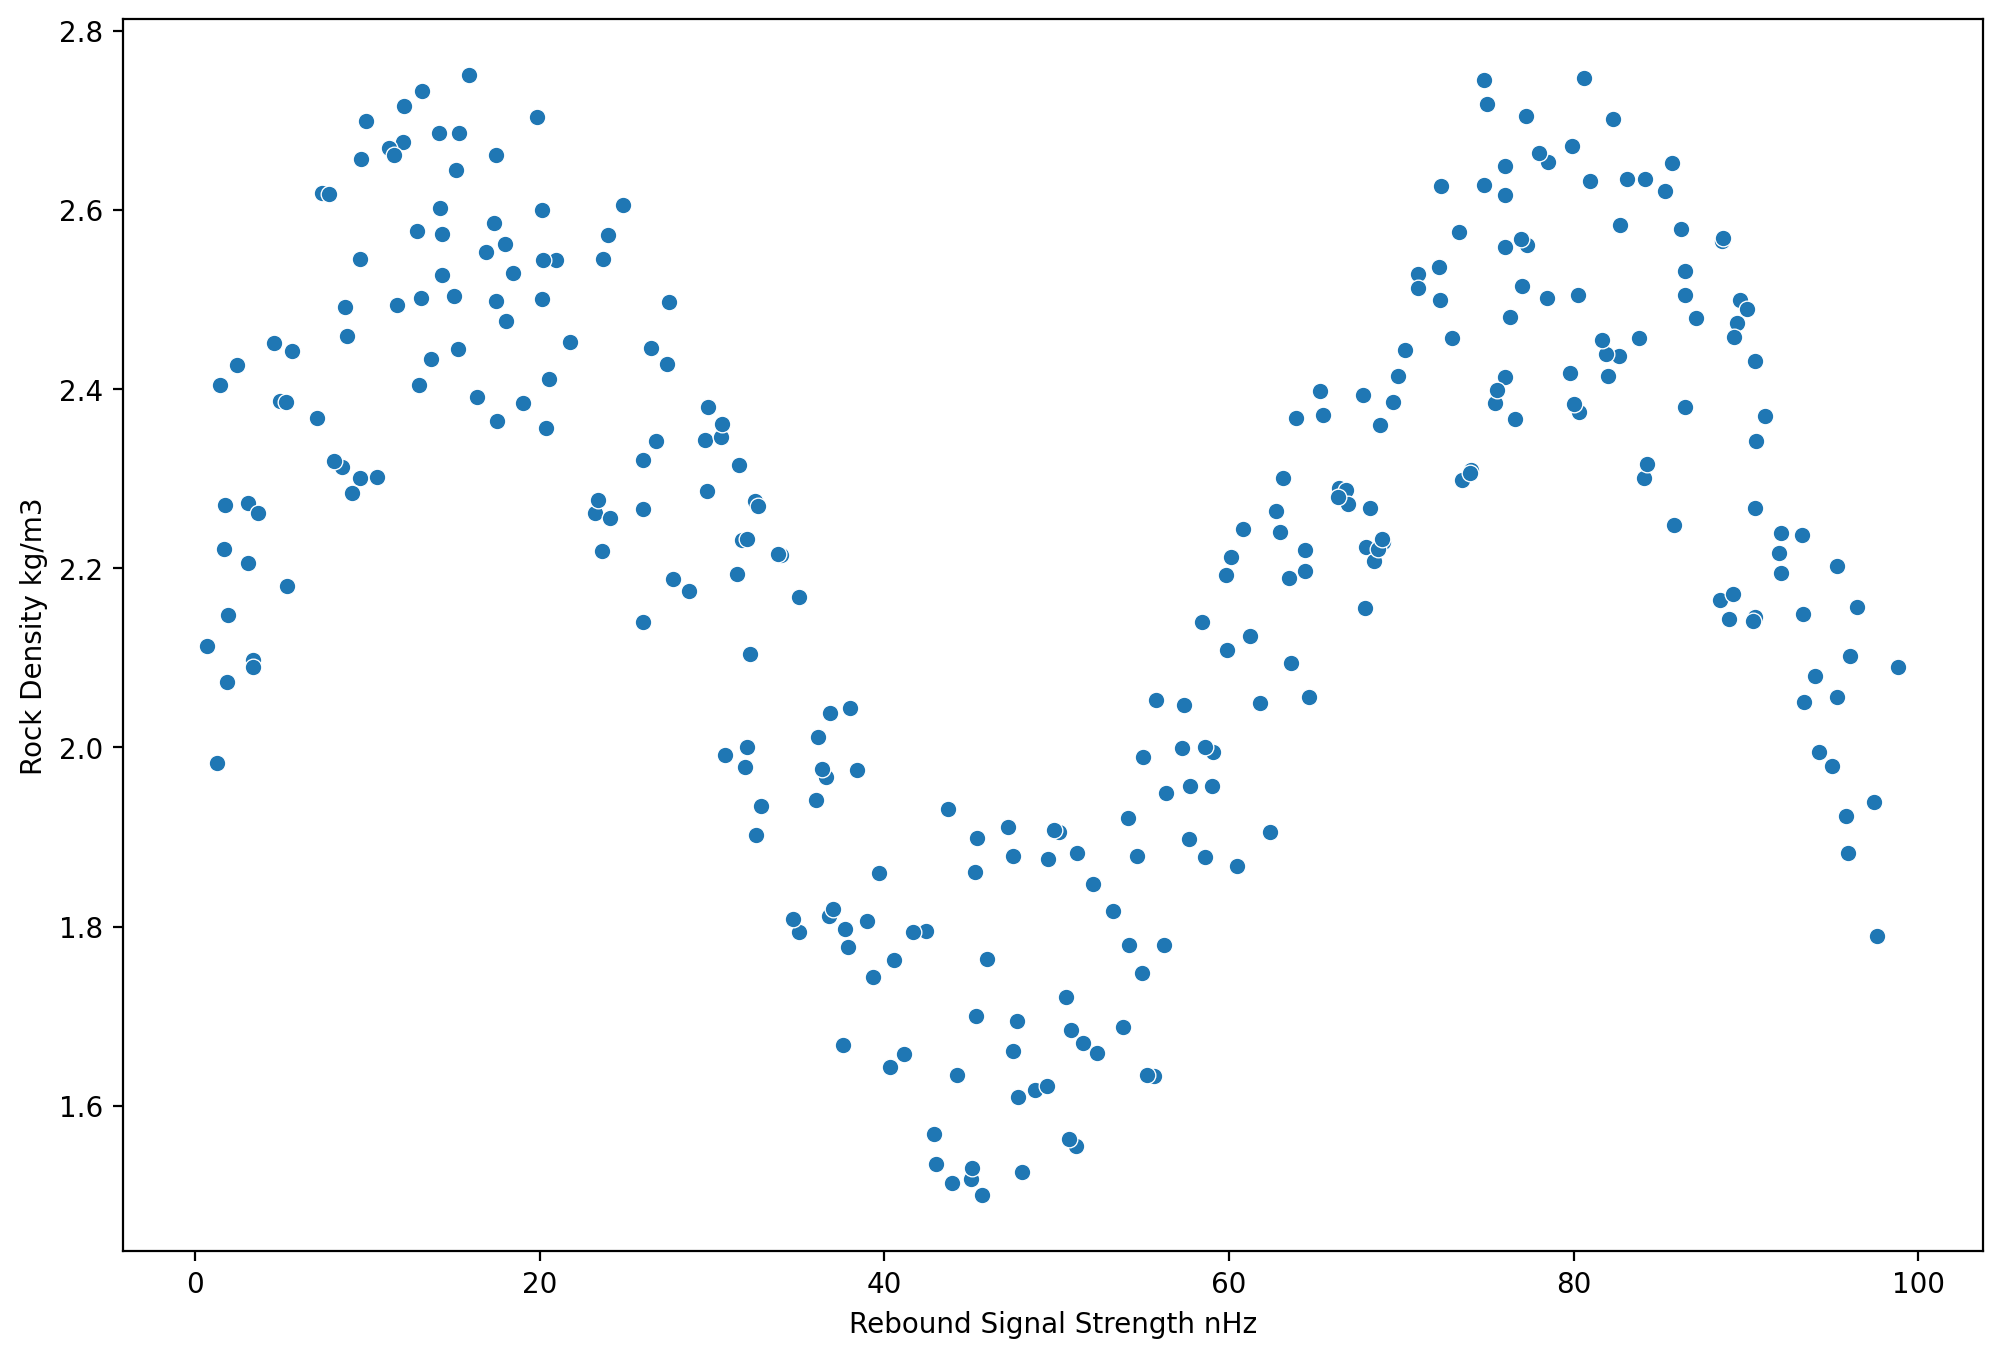

In [8]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df, x='Rebound Signal Strength nHz', y='Rock Density kg/m3')

**PERFORM FEATURE AND LABEL SEPERATION**

In [9]:
X = df.drop('Rock Density kg/m3', axis=1)

In [10]:
y = df['Rock Density kg/m3']

In [11]:
X

,Rebound Signal Strength nHz
0,72.945124
1,14.229877
2,36.597334
3,9.578899
4,21.765897
...,...
295,0.700227
296,58.586585
297,54.674548
298,15.162434


In [12]:
y

0      2.456548
1      2.601719
2      1.967004
3      2.300439
4      2.452374
         ...   
295    2.112965
296    2.000293
297    1.879181
298    2.644990
299    2.044287
Name: Rock Density kg/m3, Length: 300, dtype: float64

**PERFROM TRAIN TEST SPLIT**

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
def tt_split(feature, label):
    """Splits the dataset in train and test features and labels"""
    return train_test_split(feature, label, test_size=0.30, random_state=101)

In [15]:
X_train, X_test, y_train, y_test = tt_split(feature=X, label=y)

In [16]:
X_train

,Rebound Signal Strength nHz
34,82.667597
1,14.229877
133,96.033750
283,1.723746
279,60.482300
...,...
40,80.338991
75,12.082654
87,32.506246
63,81.896972


**CREATE AN INSTANCE OF THE RANDOM FOREST REGRESSOR MODEL**

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
def model_instance():
    return RandomForestRegressor(n_estimators=10)

In [19]:
model = model_instance()

In [20]:
model

RandomForestRegressor(n_estimators=10)

**FIT MODEL TO TRAIN FEATURE AND LABEL DATASET**

In [21]:
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

**PREDICT MODEL ON THE TEST FEATURE DATASET**

In [22]:
pred = model.predict(X_test)

In [23]:
pred

array([2.38425751, 2.63762708, 2.15622683, 2.28884707, 1.80885686,
       2.02606517, 2.09963849, 2.12735669, 2.37952701, 2.38425751,
       2.02549235, 2.11835962, 2.24498428, 2.12934132, 2.49765591,
       2.49169527, 2.47724954, 2.34043058, 2.3695329 , 2.3530711 ,
       2.10521053, 1.82888908, 2.60219237, 2.34043058, 2.19400827,
       2.27621038, 1.96825372, 1.76225264, 2.28644037, 2.5632399 ,
       2.38724272, 2.2446109 , 2.63762708, 1.93827517, 1.84681141,
       2.02549235, 2.41610308, 1.65972265, 2.04984395, 2.53966587,
       2.63659971, 2.31174512, 2.23517428, 2.59325153, 2.57262828,
       2.28884707, 2.63659971, 1.86057158, 2.60219237, 1.72070221,
       2.667804  , 2.51178222, 2.58323131, 2.5632399 , 2.27621038,
       2.26907689, 1.97426498, 1.84282463, 1.68566041, 2.11255547,
       2.258937  , 1.6174398 , 2.56846287, 2.17176903, 2.43481513,
       2.3695329 , 2.28644037, 2.11835962, 2.13697194, 2.03927661,
       1.99491781, 2.32812203, 2.35699797, 1.78170289, 2.23517

**OBTAIN THE ERROR METRICS**

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
MAE = mean_absolute_error(y_test, pred)

In [26]:
MAE

0.12399260936687115

In [27]:
MSE = mean_squared_error(y_test, pred)

In [28]:
MSE

0.023135825346708754

In [29]:
RMSE = np.sqrt(MSE)

In [30]:
RMSE

0.15210465261361586

In [31]:
signal_range = np.arange(0,100)
signal_range = signal_range.reshape(-1,1)

In [32]:
signal_pred = model.predict(signal_range)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [33]:
signal_pred

array([2.1771697 , 2.15106058, 2.12735669, 2.13697194, 2.12332048,
       2.35699797, 2.38425751, 2.46287695, 2.43822276, 2.41610308,
       2.53977309, 2.63181694, 2.67621869, 2.51627417, 2.62819754,
       2.56062354, 2.6677238 , 2.54019587, 2.53580136, 2.44505693,
       2.66310422, 2.52223402, 2.47724954, 2.258937  , 2.44602389,
       2.3196389 , 2.28884707, 2.37632848, 2.25982597, 2.23600739,
       2.3695329 , 2.25184591, 2.20240004, 2.0299344 , 2.04984395,
       1.88660786, 1.94272608, 1.83467997, 1.99491781, 1.84575102,
       1.84499071, 1.68886012, 1.69065543, 1.57839306, 1.60643168,
       1.52206841, 1.723812  , 1.89182168, 1.58649027, 1.63880426,
       1.80885686, 1.66426578, 1.7497352 , 1.7133554 , 1.72070221,
       1.87030745, 1.96946068, 1.97045797, 2.03106518, 1.97426498,
       2.20198978, 2.10894819, 2.035655  , 2.19400827, 2.2917596 ,
       2.32935662, 2.28981263, 2.27450849, 2.23517428, 2.29387302,
       2.42332451, 2.51178222, 2.52154354, 2.48031863, 2.49987

**VISUALIZE THE MODEL**

<Axes: xlabel='Rebound Signal Strength nHz', ylabel='Rock Density kg/m3'>

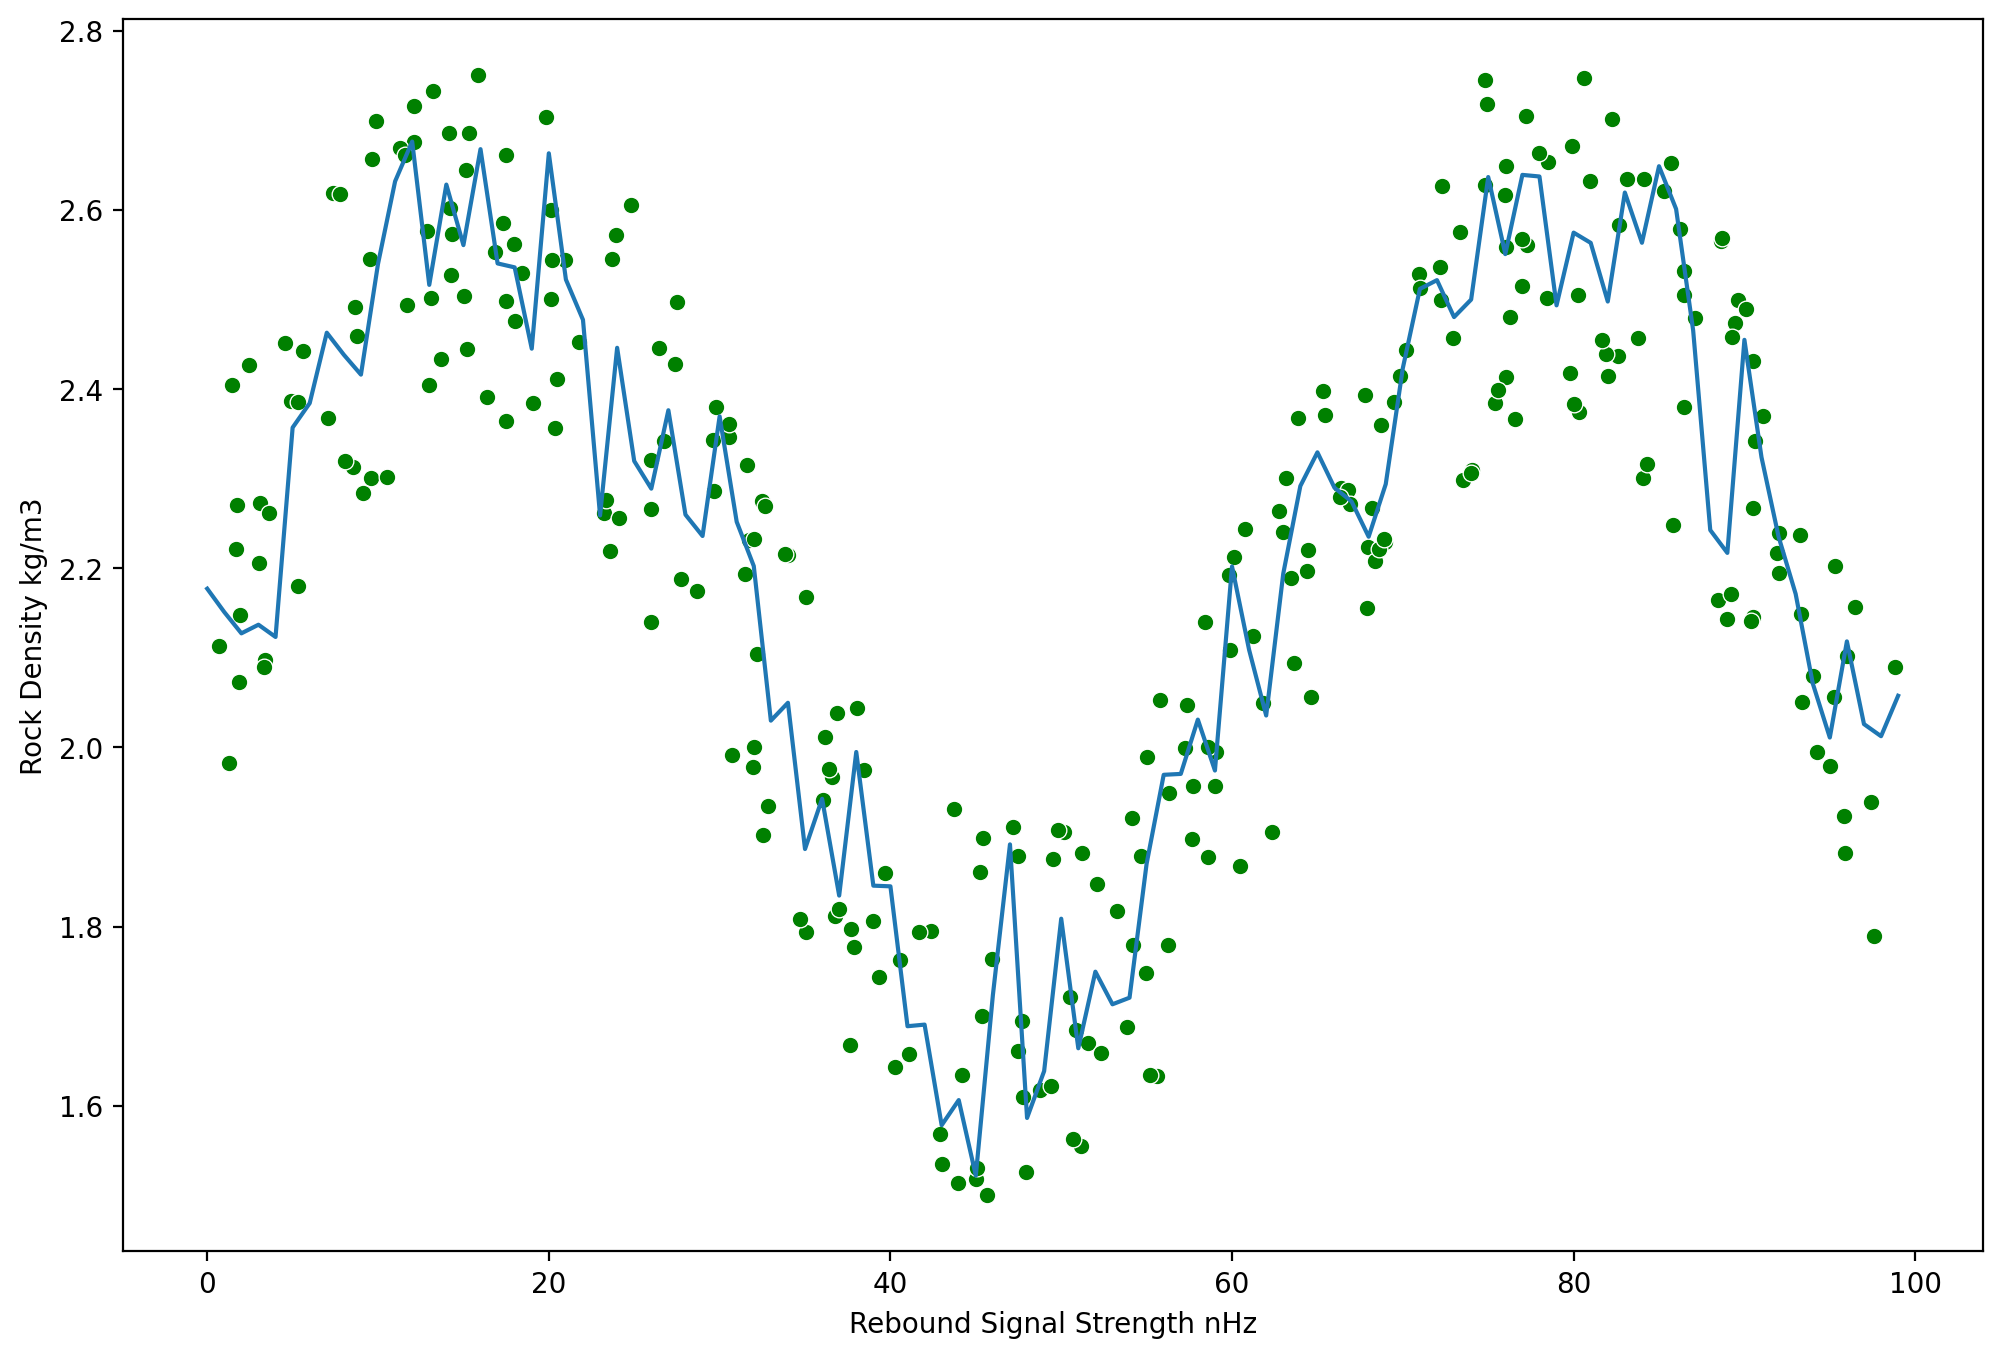

In [37]:
plt.figure(figsize=(12,8), dpi=200)
plt.plot(signal_range,signal_pred)
sns.scatterplot(data=df, x='Rebound Signal Strength nHz', y='Rock Density kg/m3', color='green')